Realizar un pequeño análisis donde se respondan a las siguientes preguntas de
negocio:
a. ¿Cuál es el tweet con mayor repercusión social?
b. ¿Cuál es el usuario que más menciona a la escuela?
c. ¿En qué mes se concentra el mayor número de tweets?
d. ¿Qué palabras son más frecuentes?
e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?
f. ¿Has sacado alguna conclusión extra en tu análisis?

In [1]:
import pandas as pd

In [2]:
# hago el eda con el data de Scweet

In [82]:
data = pd.read_csv('twiteets.csv', encoding = 'utf_8', index_col=[0])
data.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,La Product Conf & LPCx España,@LaProductConfES,2022-06-14T16:18:58.000Z,La Product Conf & LPCx España\n@LaProductConfE...,Aquí estamos a punto de comenzar #LPCxMAD con...,😊 🙌,1.0,1.0,4.0,['https://pbs.twimg.com/media/FVOdWusWQAEu5sz?...,https://twitter.com/LaProductConfES/status/153...
1,Heavy Mental,@HeavyMental_es,2022-06-13T11:33:09.000Z,Heavy Mental\n@HeavyMental_es\n·\n13 jun.,Lo prometimos y han llegado gracias a \n@TheBr...,👉,4.0,2.0,6.0,['https://pbs.twimg.com/profile_images/1546415...,https://twitter.com/HeavyMental_es/status/1536...
2,Javi Pérez Learning by doing.,@JaviMostoles,2022-06-13T11:42:21.000Z,Javi Pérez Learning by doing.\n@JaviMostoles\n...,Lo conseguí!!! Gracias \n@TheBridge_Tech\n @H...,⚡ 😎 🦾 💻 📚 🚀 👉,NaN,NaN,1.0,['https://pbs.twimg.com/profile_images/1546415...,https://twitter.com/JaviMostoles/status/153631...
3,VLCTechHub,@VLCTechHub,2022-06-15T07:00:34.000Z,VLCTechHub\n@VLCTechHub\n·\n15 jun.,Hoy \n@TheBridge_Tech\n a las 18:00: Taller Da...,NaN,NaN,1.0,1.0,[],https://twitter.com/VLCTechHub/status/15369668...
4,Mulder,@Mulder01198676,2022-06-13T15:10:50.000Z,Mulder\n@Mulder01198676\n·\n13 jun.,Respondiendo a \n@HeavyMental_es\n @TheBridge_...,NaN,NaN,NaN,2.0,['https://pbs.twimg.com/tweet_video_thumb/FVJE...,https://twitter.com/Mulder01198676/status/1536...


In [87]:
data['Timestamp']

0      2022-06-14T16:18:58.000Z
1      2022-06-13T11:33:09.000Z
2      2022-06-13T11:42:21.000Z
3      2022-06-15T07:00:34.000Z
4      2022-06-13T15:10:50.000Z
                 ...           
133    2022-09-23T08:45:56.000Z
134    2022-09-28T10:46:00.000Z
135    2022-09-28T20:14:18.000Z
136    2022-09-26T07:58:25.000Z
137    2022-09-27T19:51:59.000Z
Name: Timestamp, Length: 138, dtype: object

In [88]:
data['Month'] = pd.DatetimeIndex(data['Timestamp']).month

In [89]:
data['Month'].value_counts()

6    59
7    31
9    31
8    17
Name: Month, dtype: int64

In [90]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [91]:
data['Embedded_text_new'] =data['Embedded_text'].replace({'\n':' '}, regex=True)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   UserScreenName     138 non-null    object             
 1   UserName           138 non-null    object             
 2   Timestamp          138 non-null    datetime64[ns, UTC]
 3   Text               138 non-null    object             
 4   Embedded_text      138 non-null    object             
 5   Emojis             77 non-null     object             
 6   Comments           29 non-null     float64            
 7   Likes              54 non-null     float64            
 8   Retweets           120 non-null    float64            
 9   Image link         138 non-null    object             
 10  Tweet URL          138 non-null    object             
 11  Month              138 non-null    int64              
 12  Embedded_text_new  138 non-null    object         

In [10]:
# Comments

In [93]:
data['Comments'].value_counts()

1.0    21
2.0     4
3.0     2
4.0     1
6.0     1
Name: Comments, dtype: int64

In [94]:
data['Comments'] = data['Comments'].fillna(0)

In [95]:
data['Comments'].value_counts()

0.0    109
1.0     21
2.0      4
3.0      2
4.0      1
6.0      1
Name: Comments, dtype: int64

In [14]:
# Likes

In [96]:
data['Likes'] = data['Likes'].fillna(0)

In [16]:
# Retweets

In [97]:
data['Retweets'] = data['Retweets'].fillna(0)

In [98]:
data['total_repercusion'] = data['Retweets'] + data['Likes'] + data['Comments']

In [19]:
# el tweet con mayor repercusion global

In [99]:
data [data['total_repercusion'] == data['total_repercusion'].max()]

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Month,Embedded_text_new,total_repercusion
129,Pau Mugarra,@PauMugarra,2022-09-23 09:44:36+00:00,Pau Mugarra\n@PauMugarra\n·\n23 sept.,Y seguimos con lo prometido:\n\nPrimera quedad...,🚀,0.0,11.0,20.0,['https://pbs.twimg.com/card_img/1578320422902...,https://twitter.com/PauMugarra/status/15732469...,9,Y seguimos con lo prometido: Primera quedada ...,31.0


In [16]:
data.iloc[129]['Embedded_text_new']

'Y seguimos con lo prometido:  Primera quedada de la comunidad #CPS en Madrid : https://meetup.com/cps-spain/events/288650795?utm_medium=referral&utm_campaign=share-btn_savedevents_share_modal&utm_source=twitter… en un espacio cedido por  @TheBridge_Tech . meetup.com Primera quedada #CPS Madrid, Thu, Oct 13, 2022, 7:00 PM | Meetup ¡Primer evento de la comunidad #CPS en Madrid! Con este evento lo que queremos es empezar a darle forma a la comunidad que se está formando alrededor del #CPS (Complex Pro 11 20'

In [22]:
# el tweet con más likes

In [100]:
data [data['Likes'] == data['Likes'].max()]

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Month,Embedded_text_new,total_repercusion
83,Jot Down Magazine,@JotDownSpain,2022-07-24 10:10:39+00:00,Jot Down Magazine\n@JotDownSpain\n·\n24 jul.,El próximo jueves 28 estaremos em \n@TheBridge...,NaN,0.0,13.0,15.0,['https://pbs.twimg.com/card_img/1576714001454...,https://twitter.com/JotDownSpain/status/155114...,7,El próximo jueves 28 estaremos em @TheBridge_...,28.0


In [101]:
data.iloc[83]['Embedded_text_new']

'El próximo jueves 28 estaremos em  @TheBridge_Tech  con  @uriondo  que impartirá la masterclass «Evita el periodismo: una oda a la profesión». La asistencia es gratuita hasta completar aforo. Os esperamos. jotdown.es Masterclass con Miguel Ángel Uriondo - Jot Down Cultural Magazine El jueves 28 de julio, a las 19:00, en The Bridge, Miguel Ángel Uriondo @uriondo impartirá la primera de las masterclass gratuitas con las que presentamos el 13 15'

In [25]:
# el tweet con más retweets

In [102]:
data [data['Retweets'] == data['Retweets'].max()]

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Month,Embedded_text_new,total_repercusion
31,The Bridge,@TheBridge_Tech,2022-06-28 07:03:36+00:00,The Bridge\n@TheBridge_Tech\n·\n28 jun.,Gracias \n@HeavyMental_es\n por la tarde de ay...,🎙 👏 😍,0.0,4.0,22.0,['https://pbs.twimg.com/profile_images/1391818...,https://twitter.com/TheBridge_Tech/status/1541...,6,Gracias @HeavyMental_es por la tarde de ayer...,26.0
32,Heavy Mental,@HeavyMental_es,2022-06-29 18:00:06+00:00,Heavy Mental\n@HeavyMental_es\n·\n29 jun.,El sentido de la vida ya no es 42 -- Light Men...,NaN,2.0,6.0,22.0,['https://pbs.twimg.com/card_img/1578346480003...,https://twitter.com/HeavyMental_es/status/1542...,6,El sentido de la vida ya no es 42 -- Light Men...,30.0


In [103]:
data.iloc[31]['Embedded_text_new']

'Gracias  @HeavyMental_es  por la tarde de ayer y a todos los asistentes ¡Éxito absoluto!  Heavy Mental @HeavyMental_es · 28 jun. Graciassss a todos   Nos vemos 9/julio en el directo final de temporada en Twitch (avisaremos por aquí) y a partir de septiembre con más HEAVY, pero sobre todo con mucho MENTAL. 4 22'

In [104]:
data.iloc[32]['Embedded_text_new']

'El sentido de la vida ya no es 42 -- Light Mental edición especial  @TheBridge_Tech Heavy Mental @HeavyMental_es El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech 2 6 22'

In [29]:
# el tweet con más Comments

In [105]:
data [data['Comments'] == data['Comments'].max()]

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Month,Embedded_text_new,total_repercusion
5,The Bridge,@TheBridge_Tech,2022-06-13 11:31:04+00:00,The Bridge\n@TheBridge_Tech\n·\n13 jun.,¡Últimasentradas! El lunes 27 de junio acogere...,👉 🚨 🎙 📌 🔞 🍆 🔝 🔗,6.0,4.0,4.0,['https://pbs.twimg.com/profile_images/1391818...,https://twitter.com/TheBridge_Tech/status/1536...,6,¡Últimasentradas! El lunes 27 de junio acogere...,14.0


In [106]:
data.iloc[5]['Embedded_text_new']

'¡Últimasentradas! El lunes 27 de junio acogeremos la grabación de "El sentido de la vida ya no es 42" un episodio del podcast de  @HeavyMental_es , donde presentarán "El pequeño libro de la filosofía estoica" de  @Alienta  Si quieres asistir como públicohttps://bit.ly/3xoiW1g Heavy Mental @HeavyMental_es · 11 jun. 27/7 - 7:30PM - PODCAST PRESENCIAL MADRID, @TheBridge_Tech (Recoletos,15) SÓLO  ENTRADAS   "EL SENTIDO DE LA VIDA YA NO ES 42"   https://eventbrite.es/e/entradas-el-sentido-de-la-vida-ya-no-es-42-podcast-en-directo-by-heavy-mental-353691710427…  Invitado: @GuillermoDeHaro con @Recuenco ha escrito "El pequeño libro de la filosofía estoica" de @alienta Mostrar este hilo 6 4 4'

In [32]:
# usuario que más menciona a la escuela == es The Bridge y Heavy Mental

In [24]:
data['UserScreenName'].value_counts()

The Bridge          30
Heavy Mental         7
Mulder               5
Fujitsu España       4
diegodl              4
                    ..
carlosmcabo          1
Miki ツ               1
Christian Senra      1
hayCANAL.com         1
Apiux Tecnología     1
Name: UserScreenName, Length: 66, dtype: int64

In [34]:
#el mes en el que hay más twiters ==Junio con el 43 % de los twits

In [25]:
data['Month'].value_counts()

6    59
7    31
9    31
8    17
Name: Month, dtype: int64

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt


In [147]:
# Create Data
x=['6','7','8','9']
y =[59,31,17,31]

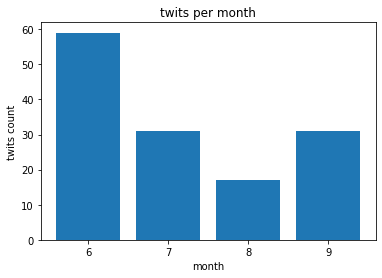

In [148]:
# Simple Bar Plot
plt.bar(x,y)
plt.xlabel('month')
plt.ylabel("twits count")
plt.title('twits per month')
plt.show()

In [26]:
porcentaje=100* 59/(59+31+31+17)
porcentaje

42.7536231884058

In [37]:
#palabra que más se repite talento con 27, formacion con 22, digital con 17

In [27]:
from collections import Counter

lista = list(data['Embedded_text_new'])
len(lista)

#for elem in lista:
entrada = ''.join(lista)

signos = ".,:;-[]{}()'\"@/¿?¡!"
a_espacios = str.maketrans(signos, " "*len(signos))
palabras = str.translate(entrada, a_espacios).lower().split()
contador = Counter(palabras)
print(contador.most_common(50))

[('de', 271), ('y', 160), ('a', 146), ('en', 119), ('la', 110), ('el', 102), ('thebridge_tech', 86), ('más', 62), ('un', 57), ('con', 55), ('que', 52), ('1', 46), ('heavymental_es', 39), ('2', 39), ('es', 38), ('para', 36), ('las', 34), ('del', 33), ('https', 33), ('por', 29), ('the', 27), ('los', 27), ('talento', 27), ('no', 25), ('5', 25), ('bridge', 23), ('ly', 23), ('4', 22), ('formación', 22), ('ya', 19), ('bit', 19), ('una', 18), ('respuesta', 18), ('com', 18), ('digital', 17), ('si', 16), ('valencia', 16), ('primera', 16), ('lo', 16), ('3', 16), ('se', 16), ('gracias', 15), ('guillermodeharo', 15), ('1respondiendo', 14), ('convenio', 14), ('sus', 13), ('#ciberseguridad', 12), ('te', 12), ('2022', 12), ('nuevo', 12)]


In [39]:
# creo el database con dos tablas

In [28]:
import sqlite3

In [29]:
data

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Month,Embedded_text_new,total_repercusion
0,La Product Conf & LPCx España,@LaProductConfES,2022-06-14 16:18:58+00:00,La Product Conf & LPCx España\n@LaProductConfE...,Aquí estamos a punto de comenzar #LPCxMAD con...,😊 🙌,1.0,1.0,4.0,['https://pbs.twimg.com/media/FVOdWusWQAEu5sz?...,https://twitter.com/LaProductConfES/status/153...,6,Aquí estamos a punto de comenzar #LPCxMAD con...,6.0
1,Heavy Mental,@HeavyMental_es,2022-06-13 11:33:09+00:00,Heavy Mental\n@HeavyMental_es\n·\n13 jun.,Lo prometimos y han llegado gracias a \n@TheBr...,👉,4.0,2.0,6.0,['https://pbs.twimg.com/profile_images/1546415...,https://twitter.com/HeavyMental_es/status/1536...,6,Lo prometimos y han llegado gracias a @TheBri...,12.0
2,Javi Pérez Learning by doing.,@JaviMostoles,2022-06-13 11:42:21+00:00,Javi Pérez Learning by doing.\n@JaviMostoles\n...,Lo conseguí!!! Gracias \n@TheBridge_Tech\n @H...,⚡ 😎 🦾 💻 📚 🚀 👉,0.0,0.0,1.0,['https://pbs.twimg.com/profile_images/1546415...,https://twitter.com/JaviMostoles/status/153631...,6,Lo conseguí!!! Gracias @TheBridge_Tech @Hea...,1.0
3,VLCTechHub,@VLCTechHub,2022-06-15 07:00:34+00:00,VLCTechHub\n@VLCTechHub\n·\n15 jun.,Hoy \n@TheBridge_Tech\n a las 18:00: Taller Da...,NaN,0.0,1.0,1.0,[],https://twitter.com/VLCTechHub/status/15369668...,6,Hoy @TheBridge_Tech a las 18:00: Taller Data...,2.0
4,Mulder,@Mulder01198676,2022-06-13 15:10:50+00:00,Mulder\n@Mulder01198676\n·\n13 jun.,Respondiendo a \n@HeavyMental_es\n @TheBridge_...,NaN,0.0,0.0,2.0,['https://pbs.twimg.com/tweet_video_thumb/FVJE...,https://twitter.com/Mulder01198676/status/1536...,6,Respondiendo a @HeavyMental_es @TheBridge_Te...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,PyData Madrid,@PyDataMadrid,2022-09-23 08:45:56+00:00,PyData Madrid\n@PyDataMadrid\n·\n23 sept.,En respuesta a \n@TheBridge_Tech\n @valerybriz...,🔥,0.0,0.0,1.0,[],https://twitter.com/PyDataMadrid/status/157323...,9,En respuesta a @TheBridge_Tech @valerybriz ...,1.0
134,The Bridge,@TheBridge_Tech,2022-09-28 10:46:00+00:00,The Bridge\n@TheBridge_Tech\n·\n28 sept.,¡Nuevo acuerdo de colaboración con \n@michaelp...,🤝,0.0,1.0,4.0,['https://pbs.twimg.com/media/FdFH7u6XEAA4bRf?...,https://twitter.com/TheBridge_Tech/status/1575...,9,¡Nuevo acuerdo de colaboración con @michaelpa...,5.0
135,Berta Otero,@bertinha84,2022-09-28 20:14:18+00:00,Berta Otero\n@bertinha84\n·\n28 sept.,Hoy por fin ve la luz mi primer Case Study púb...,NaN,0.0,3.0,4.0,['https://pbs.twimg.com/media/FdxLlU_WAAMBuCl?...,https://twitter.com/bertinha84/status/15752173...,9,Hoy por fin ve la luz mi primer Case Study púb...,7.0
136,The Bridge,@TheBridge_Tech,2022-09-26 07:58:25+00:00,The Bridge\n@TheBridge_Tech\n·\n26 sept.,¡Estamos muy orgullosos de formar equipo junto...,NaN,0.0,2.0,3.0,['https://pbs.twimg.com/profile_images/1558693...,https://twitter.com/TheBridge_Tech/status/1574...,9,¡Estamos muy orgullosos de formar equipo junto...,5.0


In [30]:
data['text'] = data['Embedded_text_new']

In [31]:
data.drop(columns = ['Text','Embedded_text','Embedded_text_new'], inplace=True)

In [32]:
data.drop(columns = ['Image link','Tweet URL'], inplace=True)

In [33]:
data.drop(columns = ['Emojis'], inplace=True)

In [34]:
data

,UserScreenName,UserName,Timestamp,Comments,Likes,Retweets,Month,total_repercusion,text
0,La Product Conf & LPCx España,@LaProductConfES,2022-06-14 16:18:58+00:00,1.0,1.0,4.0,6,6.0,Aquí estamos a punto de comenzar #LPCxMAD con...
1,Heavy Mental,@HeavyMental_es,2022-06-13 11:33:09+00:00,4.0,2.0,6.0,6,12.0,Lo prometimos y han llegado gracias a @TheBri...
2,Javi Pérez Learning by doing.,@JaviMostoles,2022-06-13 11:42:21+00:00,0.0,0.0,1.0,6,1.0,Lo conseguí!!! Gracias @TheBridge_Tech @Hea...
3,VLCTechHub,@VLCTechHub,2022-06-15 07:00:34+00:00,0.0,1.0,1.0,6,2.0,Hoy @TheBridge_Tech a las 18:00: Taller Data...
4,Mulder,@Mulder01198676,2022-06-13 15:10:50+00:00,0.0,0.0,2.0,6,2.0,Respondiendo a @HeavyMental_es @TheBridge_Te...
...,...,...,...,...,...,...,...,...,...
133,PyData Madrid,@PyDataMadrid,2022-09-23 08:45:56+00:00,0.0,0.0,1.0,9,1.0,En respuesta a @TheBridge_Tech @valerybriz ...
134,The Bridge,@TheBridge_Tech,2022-09-28 10:46:00+00:00,0.0,1.0,4.0,9,5.0,¡Nuevo acuerdo de colaboración con @michaelpa...
135,Berta Otero,@bertinha84,2022-09-28 20:14:18+00:00,0.0,3.0,4.0,9,7.0,Hoy por fin ve la luz mi primer Case Study púb...
136,The Bridge,@TheBridge_Tech,2022-09-26 07:58:25+00:00,0.0,2.0,3.0,9,5.0,¡Estamos muy orgullosos de formar equipo junto...


In [61]:
tweets = data[['text','UserScreenName', 'Comments', 'Likes', 'Retweets', 'Timestamp']]
tweets

,text,UserScreenName,Comments,Likes,Retweets,Timestamp
0,Aquí estamos a punto de comenzar #LPCxMAD con...,La Product Conf & LPCx España,1.0,1.0,4.0,2022-06-14 16:18:58+00:00
1,Lo prometimos y han llegado gracias a @TheBri...,Heavy Mental,4.0,2.0,6.0,2022-06-13 11:33:09+00:00
2,Lo conseguí!!! Gracias @TheBridge_Tech @Hea...,Javi Pérez Learning by doing.,0.0,0.0,1.0,2022-06-13 11:42:21+00:00
3,Hoy @TheBridge_Tech a las 18:00: Taller Data...,VLCTechHub,0.0,1.0,1.0,2022-06-15 07:00:34+00:00
4,Respondiendo a @HeavyMental_es @TheBridge_Te...,Mulder,0.0,0.0,2.0,2022-06-13 15:10:50+00:00
...,...,...,...,...,...,...
133,En respuesta a @TheBridge_Tech @valerybriz ...,PyData Madrid,0.0,0.0,1.0,2022-09-23 08:45:56+00:00
134,¡Nuevo acuerdo de colaboración con @michaelpa...,The Bridge,0.0,1.0,4.0,2022-09-28 10:46:00+00:00
135,Hoy por fin ve la luz mi primer Case Study púb...,Berta Otero,0.0,3.0,4.0,2022-09-28 20:14:18+00:00
136,¡Estamos muy orgullosos de formar equipo junto...,The Bridge,0.0,2.0,3.0,2022-09-26 07:58:25+00:00


In [62]:
tweeetss=tweets.applymap(str)

In [37]:
tweeetss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            138 non-null    object
 1   UserScreenName  138 non-null    object
 2   Comments        138 non-null    object
 3   Likes           138 non-null    object
 4   Retweets        138 non-null    object
 5   Timestamp       138 non-null    object
dtypes: object(6)
memory usage: 7.5+ KB


In [38]:
lista3 =tweeetss.values.tolist()

In [39]:
usuarios= data[['UserScreenName','UserName']]
usuarios

,UserScreenName,UserName
0,La Product Conf & LPCx España,@LaProductConfES
1,Heavy Mental,@HeavyMental_es
2,Javi Pérez Learning by doing.,@JaviMostoles
3,VLCTechHub,@VLCTechHub
4,Mulder,@Mulder01198676
...,...,...
133,PyData Madrid,@PyDataMadrid
134,The Bridge,@TheBridge_Tech
135,Berta Otero,@bertinha84
136,The Bridge,@TheBridge_Tech


In [40]:
usuarios = usuarios.drop_duplicates(ignore_index=True)

In [41]:
usuarios

,UserScreenName,UserName
0,La Product Conf & LPCx España,@LaProductConfES
1,Heavy Mental,@HeavyMental_es
2,Javi Pérez Learning by doing.,@JaviMostoles
3,VLCTechHub,@VLCTechHub
4,Mulder,@Mulder01198676
...,...,...
61,Ana Amaro,@AnaWhitewolf
62,LaSeñoenlaRadioTdF,@LaSenioenRadio
63,Biohub VLC,@BiohubVLC
64,graphext,@graphext


In [42]:
lista4 =usuarios.values.tolist()

In [43]:
conn = sqlite3.connect('database')
#cur = conn.cursor()

conn.execute('CREATE TABLE if not exists tweets(text TEXT,UserScreenName TEXT,Comments TEXT,Likes TEXT,Retweets TEXT,Timestamp TEXT)')

conn.executemany("INSERT INTO tweets(text,UserScreenName,Comments,Likes,Retweets,Timestamp) VALUES(?,?,?,?,?,?)", lista3)
conn.commit()
conn.close()

In [116]:
conn = sqlite3.connect('database')
#cur = conn.cursor()

conn.execute('CREATE TABLE if not exists usuarios(UserScreenName TEXT,UserName TEXT)')

conn.executemany("INSERT INTO usuarios(UserScreenName,UserName) VALUES(?,?)", lista4)
conn.commit()
conn.close()

In [ ]:
# con el modelo

Utiliza un modelo pre entrenado para determinar el sentimiento de los tweets.
Preguntas:
a. ¿Cuáles son las predicciones? Interpreta los resultados.
b. ¿Qué variables son las más importantes del modelo?
c. ¿Cómo podrías mejorar el modelo?
d. ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros
modelos de ML?

In [44]:
model = pd.read_pickle('sentiment_model')

In [45]:
model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [ ]:
# preparo los datos antes de aplicar el modelo

In [63]:
import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweeetss):
    return signos.sub('', tweeetss.lower())

tweets['text'] = tweets['text'].apply(signs_tweets)
tweets['text'].head()

c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    aquí estamos  a punto de comenzar #lpcxmad con...
1    lo prometimos y han llegado gracias a  thebrid...
2    lo conseguí gracias  thebridge_tech   heavymen...
3    hoy  thebridge_tech  a las  taller data scienc...
4    respondiendo a  heavymental_es  thebridge_tech...
Name: text, dtype: object

In [64]:
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

tweets['text'] = tweets['text'].apply(remove_links)

c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
tweets['text'].head()

0    aquí estamos a punto de comenzar #lpcxmad con ...
1    lo prometimos y han llegado gracias a thebridg...
2    lo conseguí gracias thebridge_tech heavymental...
3    hoy thebridge_tech a las taller data science v...
4    respondiendo a heavymental_es thebridge_tech y...
Name: text, dtype: object

In [65]:
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

tweets['text'] = tweets['text'].apply(remove_stopwords)
tweets['text'].head()

c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    aquí punto comenzar #lpcxmad mercadonatech the...
1    prometimos llegado gracias thebridge_tech últi...
2    conseguí gracias thebridge_tech heavymental_es...
3    hoy thebridge_tech taller data science valenci...
4    respondiendo heavymental_es thebridge_tech cot...
Name: text, dtype: object

In [66]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

tweets['text'] = tweets['text'].apply(spanish_stemmer)
tweets['text'].head()

c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    aqu punt comenz #lpcxmad mercadonatech thebrid...
1    promet lleg graci thebridge_tech ultim entrad ...
2    consegu graci thebridge_tech heavymental_ the ...
3    hoy thebridge_tech tall dat scienc valenci pri...
4    respond heavymental_ thebridge_tech cotizadisi...
Name: text, dtype: object

In [67]:
pred = model.predict(tweets['text'])

In [68]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [ ]:
# el 0 indica que es sentimiento es bueno y el 1 malo

In [74]:

prediction= pd.DataFrame(pred, columns=['feeling'] )

In [75]:
prediction

,feeling
0,0
1,0
2,0
3,0
4,1
...,...
133,0
134,0
135,0
136,1


In [76]:
prediction['feeling'].value_counts()

0    103
1     35
Name: feeling, dtype: int64

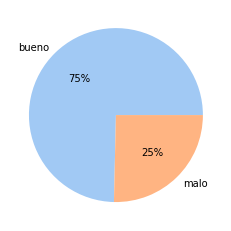

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [103, 35]
labels = ['bueno', 'malo']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [111]:
data['Embedded_text_new'][16]

'Miércoles 6 de julio, 18h evento con  @GoogleES  donde hablaremos de #CloudComputing las nuevas herramientas como #kubernetes #Serverless #CI #CD y los perfiles que actualmente necesitan las empresas #devops #cloud   Saca ya tus entradas eventbrite.es Un paseo por la nube con Google Acércate al mundo Cloud con Google'

In [137]:
data['Embedded_text_new'][9]

'Respondiendo a  @HeavyMental_es  @TheBridge_Tech  y 6 más Gracias por intentarlo pero las señales me dicen que no debía estar (mala suerte que trabajando 3h sueltas los lunes me haya pillado trabajando xdd). Me tocará esperarme a la edición de Valencia '

In [ ]:
# VARIABLES IMPORTANTES EN EL MODELO    

In [144]:
#model[0].get_feature_names_out()

In [141]:
cv =model[0]
#cv.fit(reviews_train_clean)
#X = cv.transform(reviews_train_clean)

log_reg =model[1]
#log_reg.fit(X, target)

# Importancia de los coeficientes. En total, todas las palabras vectorizadas
print(len(log_reg.coef_[0]))

# Cada coeficiente va asociado a una palabra
cv.get_feature_names()

# Montamos un diccionario con palabra -> coeficiente
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), log_reg.coef_[0]
    )
}

1000


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [143]:

for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print(best_negative)
    
print('################################')
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print(best_positive)
    

('cuent', 1.427233666085361)
('deficit', 1.4022058325629765)
('blanc', 1.368604445686843)
('muert', 1.3502570413482133)
('conden', 1.3429067328197288)
################################
('encant', -1.8605111981502893)
('enhorabuen', -1.8449366081495842)
('graci', -1.805329609096349)
('buen', -1.6751185631684895)
('feliz', -1.4730851687952473)


In [154]:
import os

In [159]:
import nltk

In [160]:
nltk.__version__


'3.7'

In [161]:
re.__version__

'2.2.1'

In [163]:
import pickle

In [164]:
pickle.__version__

AttributeError: module 'pickle' has no attribute '__version__'

In [2]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
